# Least square approximation

## Introduction to Least Squares and the Normal Equation

The **Least Squares** method is a fundamental approach in regression analysis used to find the best-fitting curve or 
line to a given set of data points by minimizing the sum of the squares of the vertical deviations (residuals) from each 
data point to the curve. This technique is widely used in data fitting, statistics, and machine learning.

### Discrete Case
Given a set of observed data points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, we aim to find a function $y = g(x)$ from a 
chosen family of functions that best approximates the data. The least squares method seeks the function $g$ that minimizes the 
sum of the squared differences between the observed values $y_i$ and the predicted values $g(x_i)$, where $g(x)$ is expressed as a 
linear combination of $m$ basis functions, $\{\phi_j(x)\}$:

$$
g(x) = \sum_{j=0}^m a_j \phi_j(x).
$$


Given the data points, we can express the problem in matrix form:
$$
\underline{\bf y} = A \underline{\bf a}
$$
where
$$
A=\begin{bmatrix}
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_m(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_m(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(x_n) & \phi_1(x_n) & \cdots & \phi_m(x_n)
\end{bmatrix},
$$
$$
\underline{\bf a} = \begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_m
\end{bmatrix}
$$
and
$$
\underline{\bf y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}.
$$

Here, $\{\phi_j(x)\}$ are the chosen basis functions (such as polynomials, sines, cosines, etc.), and $a_j$ are the coefficients 
to be determined.
The problem is to find the coefficients $a_j$ that minimize the sum of squared residuals:
$$
\min_{\bf a} \sum_{i=1}^n (y_i - g(x_i))^2  = \min_{\bf a}({\bf y}-A{\bf a})^T({\bf y}-A{\bf a})
$$
where
$$
A{\bf a} = \begin{bmatrix}
g(x_1) \\
g(x_2) \\
\vdots \\
g(x_n)
\end{bmatrix}
$$

Leading the _normal equation_:
$$
A^T A \underline{\bf a} = A^T \underline{\bf y}
$$
**Example** 
If the basis functions are polynomials of increasing power:
$$
g(x)= a_0+a_1 x+a_2 x^2 + \ldots a_m x^m
$$
with $\phi_k(x) = x^{k}$ for $k=0,2,\ldots,m$.
Now the matrix $A$ becomes the (**Vandermonde matrix**):
$$
A= \begin{bmatrix}
    1 & x_1 & \cdots & x_1^m \\
    1 & x_2 & \cdots & x_2^m \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_n & \cdots & x_n^m
\end{bmatrix}.
$$


### Continuous Case
In the continuous case, we consider a function $f(x)$ defined over a continuous domain, $x\in[a,b]$. 
The goal remains the same: to find the function that minimizes the sum 
of squared errors between the observed values and the predicted values.

We can express the continuous version of the least squares problem as:

$$
\min_{\bf a} \int_a^b (f(x) - g(x,{\bf a}))^2 \, dx
$$


#### The Normal Equation for continuous case

To derive the normal equation, we start with the least squares objective function:
$$
J(f) = \int_a^b (f(x) - g(x,{\bf a}))^2 \, dx
$$
on component form:
$$
J(f) = \int_a^b (f(x) - g(x,{\bf a}))^2 \, dx = \int_a^b (f(x) - \sum_{j=0}^m a_j \phi_j(x))^2 \, dx
$$
The partial derivative of $J(f)$ with respect to each coefficient $a_k$ is set to zero to find the minimum:
$$
\frac{\partial J(f)}{\partial a_k} = \int_a^b 2(f(x) - \sum_{j=0}^m a_j \phi_j(x))(-\phi_k(x)) \, dx = -2 \int_a^b f(x)\phi_k(x) \, dx + 2 \sum_{j=0}^m a_j \int_a^b   \phi_j(x)\phi_k(x) \, dx = -2 b_k + 2 \sum_{j=0}^m a_j c_{jk} = 0
$$
where
$$
b_k = \int_a^b f(x)\phi_k(x) \, dx, \quad c_{jk} = \int_a^b \phi_j(x)\phi_k(x) \, dx
$$
giving the equations:
$$
\sum_{j=0}^m a_j c_{jk} = b_k, \quad k=0,1,\ldots,m
$$
or on matrix form:
$$
\underline{\bf C} \underline{\bf a} = \underline{\bf b}
$$
where
$$
\underline{\bf C} = \begin{bmatrix}
c_{00} & c_{01} & \cdots & c_{0m} \\
c_{10} & c_{11} & \cdots & c_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
c_{m0} & c_{m1} & \cdots & c_{mm}
\end{bmatrix}, \quad
\underline{\bf a} = \begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_m
\end{bmatrix}, \quad
\underline{\bf b} = \begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_m
\end{bmatrix}
$$

Notice that $\underline{\bf c}$ is a symmetric matrix, i.e., $c_{jk} = c_{kj}$.

# Discrete example from Turner
Table 4.1 from Turner et al. Driving at the specified speed, this shows the distance the car traveled after the driver was told to stop. 

| Speed (km/h) | Distance (m) |
|--------------|-------------|
| 40           | 17          |
| 55           | 31          |
| 70           | 46          |
| 90           | 65          |
| 100          | 87          |

```python
# Data from the table
speed = np.array([40, 55, 70, 90, 100])
distance = np.array([17, 31, 46, 65, 87])

# Construct A matrix for second order polynomial: [1, speed, speed^2]
A = np.column_stack([np.ones_like(speed), speed, speed**2])
y_vec = distance

print("A matrix:\n", A)
print("y vector:\n", y_vec)

# Manually solve the normal equation for LSQ: beta = (A^T A)^(-1) A^T y
ATA = A.T @ A
ATy = A.T @ y_vec
coeffs = np.linalg.inv(ATA) @ ATy
print("Manual LSQ polynomial coefficients:", coeffs)
```


In [40]:
import numpy as np
# Data from the table
speed = np.array([40, 55, 70, 90, 100])
distance = np.array([17, 31, 46, 65, 87])

# Construct A matrix for second order polynomial: [1, speed, speed^2]
A = np.column_stack([np.ones_like(speed), speed, speed**2])
y_vec = distance

print("A matrix:\n", A)
print("y vector:\n", y_vec)

A matrix:
 [[    1    40  1600]
 [    1    55  3025]
 [    1    70  4900]
 [    1    90  8100]
 [    1   100 10000]]
y vector:
 [17 31 46 65 87]


In [41]:
# Manually solve the normal equation for LSQ: beta = (A^T A)^(-1) A^T y
ATA = A.T @ A
ATy = A.T @ y_vec
coeffs = np.linalg.inv(ATA) @ ATy
print("Manual LSQ polynomial coefficients:", coeffs)

Manual LSQ polynomial coefficients: [3.40125392 0.07016719 0.00738767]


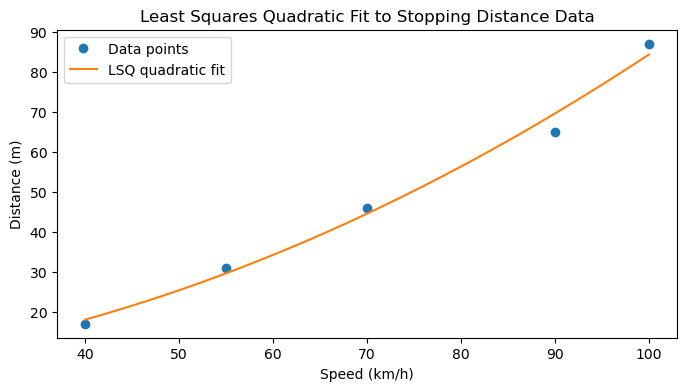

In [42]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(speed, distance, 'o', label='Data points')
speed_fit = np.linspace(speed.min(), speed.max(), 200)
distance_fit = coeffs[0] + coeffs[1] * speed_fit + coeffs[2] * speed_fit**2
plt.plot(speed_fit, distance_fit, label='LSQ quadratic fit')
plt.xlabel('Speed (km/h)')
plt.ylabel('Distance (m)')
plt.title('Least Squares Quadratic Fit to Stopping Distance Data')
plt.legend()
plt.show()

**Task** 
Look at the example in the book. Found that $a_0=0$, $a_1 = 0.1728$ and $a_2 = 0.0067$. Why?

Book polynomial coefficients: [0, 0.1728, 0.0067]
Our coefficients: [3.40125392 0.07016719 0.00738767]


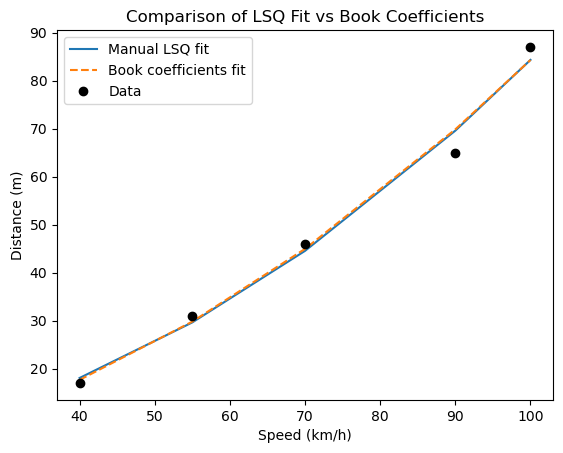

In [43]:
coeffs_poly_book=[0,0.1728,0.0067]
print("Book polynomial coefficients:", coeffs_poly_book)
print("Our coefficients:", coeffs)

x_arr=np.linspace(0, 150, 100)
x_arr=speed
# Fit curves using both sets of coefficients
y_manual = coeffs[0] + coeffs[1] * x_arr + coeffs[2] * x_arr**2
y_book = coeffs_poly_book[0] + coeffs_poly_book[1] * x_arr + coeffs_poly_book[2] * x_arr**2
plt.plot(x_arr, y_manual, label='Manual LSQ fit')
plt.plot(x_arr, y_book, '--', label='Book coefficients fit')
plt.plot(speed, distance, 'ko', label='Data')  # include the data points

plt.xlabel('Speed (km/h)')
plt.ylabel('Distance (m)')
plt.title('Comparison of LSQ Fit vs Book Coefficients')
plt.legend()
plt.show()

## Example 14: **Continuous Least Squares Cubic Approximation to $\sin x$ on $[0, \pi]$**

We seek a cubic polynomial $p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3$ that best approximates $\sin x$ on $[0, \pi]$ in the least squares sense. The coefficients minimize
$$
F({\bf a})=\int_0^\pi \left( \sin x - (a_0 + a_1 x + a_2 x^2 + a_3 x^3) \right)^2 dx
$$

The normal equations are:
$$
\frac{\partial F}{\partial a_k}=\int_0^\pi x^k \left( \sin x - \sum_{j=0}^3 a_j x^j \right) dx = 0, \quad k=0,1,2,3
$$

This leads to a linear system $A\mathbf{a} = \mathbf{b}$, where
- $A_{kj} = \int_0^\pi x^{k+j} dx$
- $b_k = \int_0^\pi x^k \sin x \, dx$

The solution gives the best cubic approximation in the $L^2$ sense. This approach can be implemented numerically using quadrature for the integrals and solving the resulting linear system for $a_0, a_1, a_2, a_3$.

In [44]:
from scipy.integrate import quad

# Compute A matrix for continuous least squares cubic approximation to sin(x) on [0, pi]
A_cont = np.zeros((4, 4))
b_cont = np.zeros(4)

for k in range(4):
    for j in range(4):
        A_cont[k, j], _ = quad(lambda x: x**(k + j), 0, np.pi) # Integral of x^(k+j) from 0 to pi
    b_cont[k], _ = quad(lambda x: x**k * np.sin(x), 0, np.pi) # Integral of x^k * sin(x) from 0 to pi

print("A matrix (continuous):\n", A_cont)
print("b vector (continuous):\n", b_cont)

A matrix (continuous):
 [[  3.14159265   4.9348022   10.33542556  24.35227276]
 [  4.9348022   10.33542556  24.35227276  61.20393696]
 [ 10.33542556  24.35227276  61.20393696 160.23153226]
 [ 24.35227276  61.20393696 160.23153226 431.47046111]]
b vector (continuous):
 [ 2.          3.14159265  5.8696044  12.15672076]


In [45]:
# Compute eigenvalues and condition number of A matrix from discrete LSQ example
eigenvalues = np.linalg.eigvals(A_cont)
condition_number = np.linalg.cond(A_cont)

print("Eigenvalues of A:", eigenvalues)
print("Condition number of A:", condition_number, "it is pretty large")

Eigenvalues of A: [5.01483907e+02 4.20389253e+00 4.47850074e-01 1.57668496e-02]
Condition number of A: 31806.221240973515 it is pretty large


In [46]:
a=np.linalg.inv(A_cont)@b_cont # Solve for coefficients
print("Coefficients of LSQ cubic polynomial:", a)


Coefficients of LSQ cubic polynomial: [-5.04654978e-02  1.31223620e+00 -4.17697757e-01  2.59476120e-15]


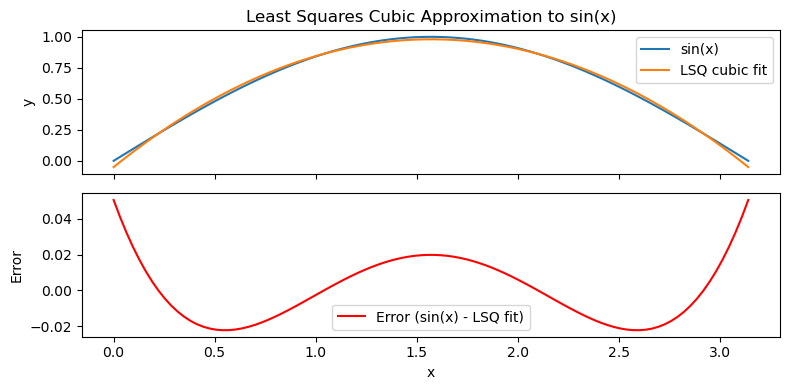

In [47]:
x=np.linspace(0, np.pi, 100)
y=np.sin(x)
Y_lsq=np.polyval(a[::-1], x)
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Top: sin(x) and LSQ cubic fit
axs[0].plot(x, y, label='sin(x)')
axs[0].plot(x, Y_lsq, label='LSQ cubic fit')
axs[0].set_ylabel('y')
axs[0].set_title('Least Squares Cubic Approximation to sin(x)')
axs[0].legend()

# Bottom: Error
error = y - Y_lsq
axs[1].plot(x, error, color='r', label='Error (sin(x) - LSQ fit)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
axs[1].legend()

plt.tight_layout()
plt.show()

**Task**
- What happens if you plot $sin(x)$ and the polynomial for larger x-domain?
- Can you make the error smaller by using a higher degree polynomial? 




## Example: Least Squares with Ill-Conditioned Matrix

To demonstrate ill-conditioning, we sample 50 points from $\sin(x)$ on $[0, \pi]$, add noise, and fit a high-degree polynomial (e.g., degree 5). The resulting Vandermonde matrix becomes ill-conditioned, leading to unstable least squares solutions.

```python
np.random.seed(42)
n_points = 50
x_sample = np.linspace(0, 2*np.pi, n_points)
y_sample = np.sin(x_sample)
noise_ramp=5.e-1
noise = np.random.uniform(0, noise_ramp, size=n_points)
y_noisy = y_sample + 2*(noise-0.5*noise_ramp)
deg = 5
# Construct Vandermonde matrix for polynomial fitting
# Each column corresponds to x_sample raised to increasing powers (from 0 to deg)
# For example, for deg=3: [1, x, x^2, x^3]
# Build Vandermonde matrix manually (each column: x_sample**p for p=0..deg)
A_vander = np.stack([x_sample**p for p in range(deg + 1)], axis=1)
ATA = A_vander.T @ A_vander
ATy = A_vander.T @ y_noisy
coeffs_vander = np.linalg.inv(ATA) @ ATy
cond_vander = np.linalg.cond(A_vander)
y_fit_vander = np.polyval(coeffs_vander[::-1], x_sample)
```

***Task*** Change the $deg$ variable and see what's happening.


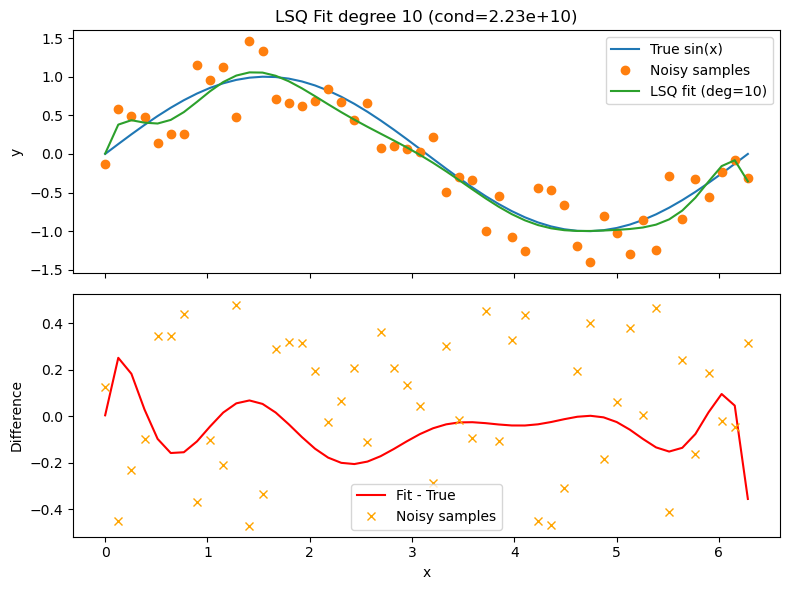

In [56]:
np.random.seed(42)
deg = 10  # Degree of polynomial fit
n_points = 50 # Number of sample points
# Sample points from sin(x) with added noise
x_sample = np.linspace(0, 2*np.pi, n_points)
y_sample = np.sin(x_sample)
noise_ramp=5.e-1
noise = np.random.uniform(0, noise_ramp, size=n_points)
y_noisy = y_sample + 2*(noise-0.5*noise_ramp)

# Construct Vandermonde matrix for polynomial fitting
# Each column corresponds to x_sample raised to increasing powers (from 0 to deg)
# For example, for deg=3: [1, x, x^2, x^3]
# Build Vandermonde matrix manually (each column: x_sample**p for p=0..deg)
A_vander = np.stack([x_sample**p for p in range(deg + 1)], axis=1)
ATA = A_vander.T @ A_vander
ATy = A_vander.T @ y_noisy
coeffs_vander = np.linalg.inv(ATA) @ ATy
cond_vander = np.linalg.cond(A_vander)
y_fit_vander = np.polyval(coeffs_vander[::-1], x_sample)

# Plot the difference in a subplot beneath
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(x_sample, y_sample, label='True sin(x)')
axs[0].plot(x_sample, y_noisy, 'o', label='Noisy samples')
axs[0].plot(x_sample, y_fit_vander, label=f'LSQ fit (deg={deg})')
axs[0].set_ylabel('y')
axs[0].set_title(f'LSQ Fit degree {deg} (cond={cond_vander:.2e})')
axs[0].legend()

diff = y_fit_vander - y_sample
axs[1].plot(x_sample, diff, color='r', label='Fit - True')
axs[1].plot(x_sample, y_sample-y_noisy,'x', color='orange', label='Noisy samples')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Difference')
axs[1].legend()

plt.tight_layout()
plt.show()

## Example overfitting
This interactive Plotly visualization demonstrates polynomial least squares fitting and the concept of overfitting. Synthetic noisy data is generated from a quadratic function, and polynomial models of degrees 1 through 15 are fit to the data. The slider allows you to select the polynomial degree and observe how the fit changes:

- **Low-degree polynomials** (e.g., degree 1 or 2) may underfit the data, failing to capture its curvature.
- **Higher-degree polynomials** can fit the training data very closely, but may exhibit large oscillations and poor generalization outside the data range—this is known as overfitting.
- The true underlying function is shown for comparison.

**Task:** Use the slider to explore how increasing the polynomial degree affects the fit and the risk of overfitting.

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Generer syntetiske data
np.random.seed(0)
x = np.linspace(-3, 3, 30)
true_y = 0.5 * x**2 + x + 2
noise = np.random.normal(0, 2, size=x.shape)
y = true_y + noise

# x-verdier for modellprediksjon
x_fit = np.linspace(-3.5, 3.5, 300)

# Lag modeller for grader 1 til 15
traces = []
for deg in range(1, 16):
    coefs = np.polyfit(x, y, deg)
    y_fit = np.polyval(coefs, x_fit)
    trace = go.Scatter(x=x_fit, y=y_fit, name=f'Degree {deg}', visible=(deg == 2))
    traces.append(trace)

# Treningsdata og sann funksjon
scatter_data = go.Scatter(x=x, y=y, mode='markers', name='Training Data', marker=dict(color='blue'))
true_func = go.Scatter(x=x_fit, y=0.5 * x_fit**2 + x_fit + 2, mode='lines',
                       name='True function', line=dict(dash='dot', color='green'))

# Sett opp figuren
fig = go.Figure(data=[scatter_data, true_func] + traces)

# Slider-trinn
steps = []
for i in range(15):
    step = dict(
        method='update',
        args=[{'visible': [True, True] + [j == i for j in range(15)]},
              {'title': f'Least Squares Fit - Polynomial Degree {i+1}'}],
        label=f'{i+1}'
    )
    steps.append(step)

# Legg til slider
sliders = [dict(
    active=1,
    currentvalue={"prefix": "Polynomial Degree: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title='Least Squares Fit - Polynomial Degree 2',
    xaxis_title='x',
    yaxis_title='y',
    legend_title='Explanation'
)
fig.update_yaxes(range=[-3, 10])
fig.show()


## Example Continuous LSQ 
Given the function:
$f(x)= 5 sin(x)+2cos(2x)$ for $x\in[0,2\pi]$.
We aim to approximate this function with a polynomial.  


 

Condition number (A matrix, continuous):
 1788558.0841075133


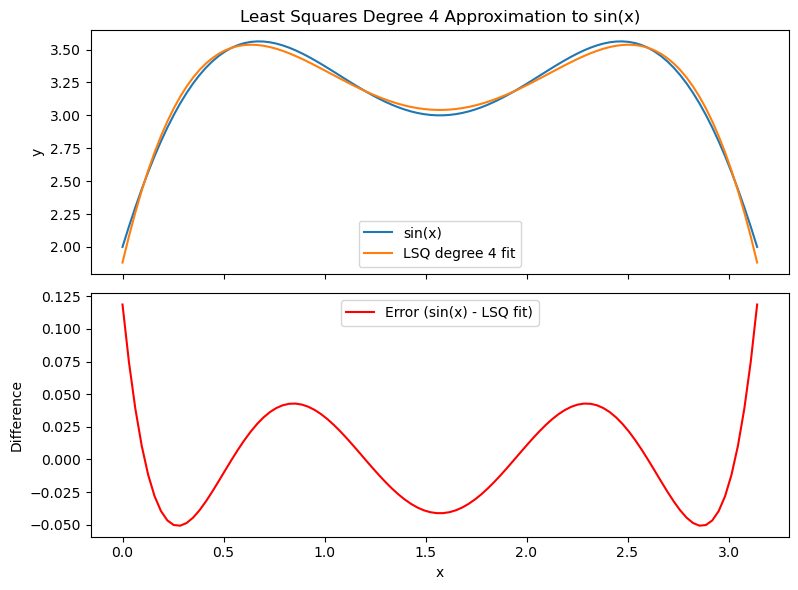

In [54]:

f=lambda x: 5*np.sin(x)+2*np.cos(2*x) # Define the function to approximate

# Compute A matrix for continuous least squares
dim=5
A_cont = np.zeros((dim, dim))
b_cont = np.zeros(dim)

for k in range(dim):
    for j in range(dim):
        A_cont[k, j], _ = quad(lambda x: x**(k + j), 0, np.pi)
    b_cont[k], _ = quad(lambda x: x**k * f(x), 0, np.pi)
    
# Add random noise to b_cont
noise_level = 0.
b_cont_noisy = b_cont + noise_level * np.random.randn(dim)

coeffs = np.linalg.inv(A_cont) @ b_cont_noisy


print("Condition number (A matrix, continuous):\n", np.linalg.cond(A_cont))
x_plot = np.linspace(0, np.pi, 100)
y_true = f(x_plot)
y_lsq = np.polyval(coeffs[::-1], x_plot)


# Plot the difference in a subplot below
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(x_plot, y_true, label='sin(x)')
axs[0].plot(x_plot, y_lsq, label=f'LSQ degree {dim-1} fit')
axs[0].set_ylabel('y')
axs[0].set_title(f'Least Squares Degree {dim-1} Approximation to sin(x)')
axs[0].legend()

diff = y_true - y_lsq
axs[1].plot(x_plot, diff, color='r', label='Error (sin(x) - LSQ fit)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Difference')
axs[1].legend()

plt.tight_layout()
plt.show()


### Using Fourier basis
Repeat the example above using Fourier polynomials. 
The Fourier basis up to degree 5 consists of the following functions:
- $\displaystyle 1$
- $\displaystyle \sin(x)$, $\cos(x)$
- $\displaystyle \sin(2x)$, $\cos(2x)$
- $\displaystyle \sin(3x)$, $\cos(3x)$
- $\displaystyle \sin(4x)$, $\cos(4x)$
- $\displaystyle \sin(5x)$, $\cos(5x)$

Or, as a sum:
$$
g(x) = a_0 + \sum_{k=1}^{5} \left[ a_{2k-1} \sin(kx) + a_{2k} \cos(kx) \right]
$$

In total, this gives $2 \times 5 + 1 = 11$ basis functions. The least squares fit finds the best coefficients for each basis function to approximate the target function over the interval $[0, 2\pi]$.

coeffs_fourier: [-1.41950686e-17  5.00000000e+00  1.36608794e-16  9.90302727e-17
  2.00000000e+00 -8.73059177e-16  1.08618493e-15 -3.43131094e-16
  1.38577946e-15 -1.01494087e-15  3.82508899e-17]


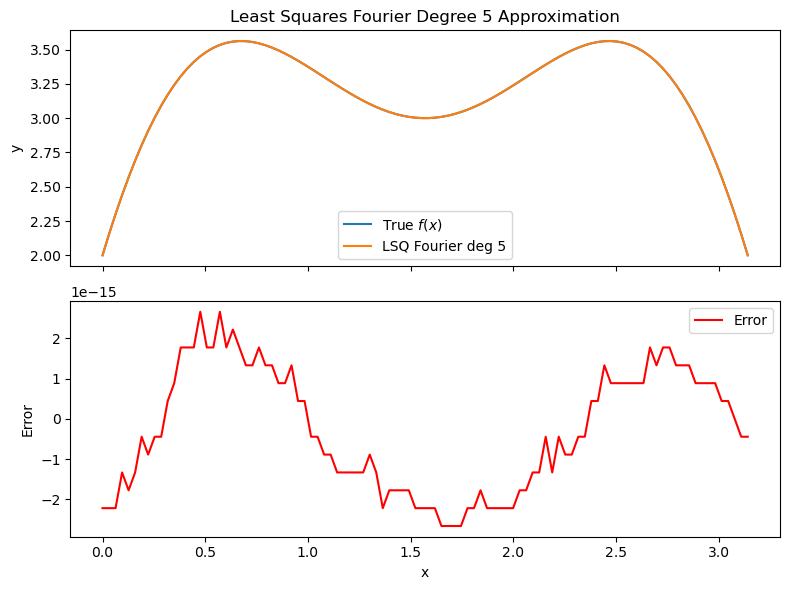

In [38]:
from numpy.polynomial.legendre import Legendre
from scipy.integrate import quad

# Fourier basis: [1, sin(x), cos(x), sin(2x), cos(2x), ...] up to degree deg_fourier
deg_fourier = 5
basis_funcs = [lambda x: 1.0]
for k in range(1, deg_fourier + 1):
    basis_funcs.append(lambda x, k=k: np.sin(k * x))
    basis_funcs.append(lambda x, k=k: np.cos(k * x))

n_basis = len(basis_funcs)
A_fourier = np.zeros((n_basis, n_basis))
b_fourier = np.zeros(n_basis)

# Integrate over [0, 2π]
for i, phi_i in enumerate(basis_funcs):
    for j, phi_j in enumerate(basis_funcs):
        integrand_A = lambda x: phi_i(x) * phi_j(x)
        A_fourier[i, j], _ = quad(integrand_A, 0, 2 * np.pi)
    integrand_b = lambda x: f(x) * phi_i(x)
    b_fourier[i], _ = quad(integrand_b, 0, 2 * np.pi)


coeffs_fourier = np.linalg.solve(A_fourier, b_fourier)
print("coeffs_fourier:", coeffs_fourier)
# Evaluate Fourier fit
y_fourier_lsq = np.zeros_like(x_plot)
for i, phi in enumerate(basis_funcs):
    y_fourier_lsq += coeffs_fourier[i] * phi(x_plot)

# Plot result
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(x_plot, y_true, label='True $f(x)$')
axs[0].plot(x_plot, y_fourier_lsq, label=f'LSQ Fourier deg {deg_fourier}')
axs[0].set_ylabel('y')
axs[0].set_title(f'Least Squares Fourier Degree {deg_fourier} Approximation')
axs[0].legend()

axs[1].plot(x_plot, y_true - y_fourier_lsq, color='r', label='Error')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
axs[1].legend()

plt.tight_layout()
plt.show()


***Tasks** 
- Play with the lambda function and confirm that the LSQ gives reasonable results. What happens if you add some random noise to the function?
- Can you repeat the examples using _scipy_ routines?  